# Descriptive Statistics and Data Visualization
This notebook covers exploratory analysis for 430 features<br>
coming from 9 different categories of clinical data<br>
The analysis will include three steps:<br>
1. Extract Descriptive Statistics for each feature
2. Visualize the distribution 
3. Brief Summary of Findings

<br>

| Table Name | Variable |Description | 
| :--- | :--- | :--- | 
| Research Session Attendance|RSA |Records attendence for each week of treatment | 
| Demographics|DEM |Sex, Ethnicity, Race | 
| Urine Drug Screen| UDS  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|DSM |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|MDH |Tracks medical and psychiatric history of 24 different Conditions| 
| Physical Exam|PEX |Tracks the appearance and condition of patients for 12 different physical observations| 
| Pregnancy and Birth Control|PBC |Pregnancy test taken once per month on weeks 0, 4, 8, 12, 16, 20, 24| 
| Timeline Follow Back Survey|TFB |Surveys for self reported drug use, collected every 4 weeks, includes previous 30 days of use ot week 0, 4, 8, 12, 16, 20, 24| 
| Dose Record |DOS |Records the medication, averge weekly dose and week of treatment| 


### Import Required Libraries

In [2]:
import pandas as pd # data manipulation
import numpy as np # numerical computation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # enhanced visualization
import warnings # ignore warnings
import helper # custom data transformation functions
from IPython.display import display, Markdown # display and markdown conversion
import re # regular expressions
warnings.filterwarnings('ignore') # ignore warnings

# Load the data
data = pd.read_csv('../data/merged_data.csv')

# Display the first few rows of the data
data.shape

(1917, 431)

### Review RSA Data
Research Session Attendance: RSA<br>
Records attendence for 24 weeks of treatment. <br>
Recorded each week<br>

Descriptive statistics for each week of attendence:<br>
- Avg weekly attendance 851 patients per week
- Avg proportion of patients attending weekly 44%
<br>


<br>
We will plot the weekly distribution of percentage of patients attending treatment

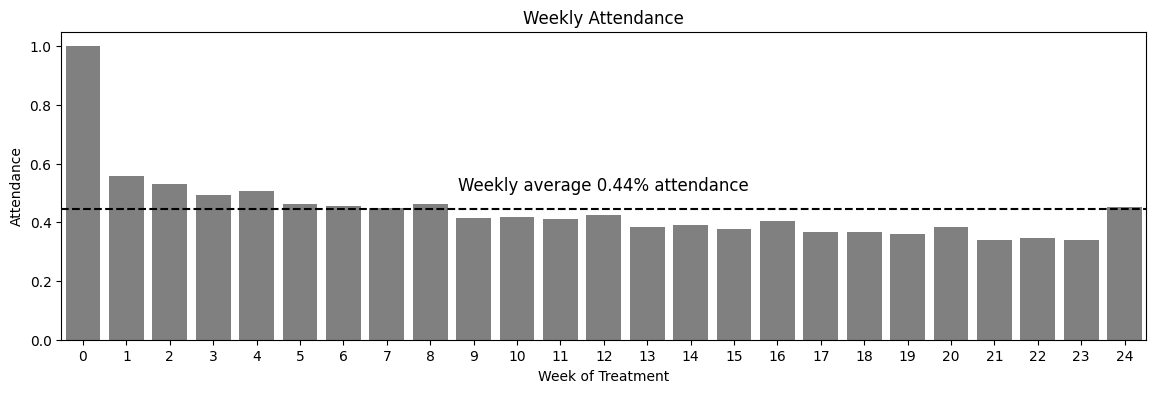

In [3]:
# create df for rsa clinical data
rsa = helper.series_func(data, 'rsa', 'mean')

# set params to plot the data series
series, title, ylabel, xlabel = rsa, 'Weekly Attendance', 'Attendance', 'Week of Treatment'

# call helper function to plot the data series
helper.plot_func(series, title, ylabel, xlabel)
# create bespoke annotation for this table
plt.annotate(
        f"Weekly average {series.mean().round(2)}% attendance",
        xy=(0.5, 0.5),
        xycoords="axes fraction",
        ha="center",
        va="center",
        fontsize=12,
        color="black",
    );

### Review Demographic Data
Demographics: DEM<br>
Data includes response to questions about gender, race and ethnicity<br>
Data includes 12 different responses<br>
Data collected at baseline assessment<br>

<br>

|    | column                    | value              |   count |   percentage |
|---:|:--------------------------|:-------------------|--------:|-------------:|
|  0 | dem_gender                | male               |    1283 |         0.67 |
|  1 | dem_gender                | female             |     631 |         0.33 |
|  3 | dem_ethnicity             | not_spanish_origin |    1579 |         0.82 |
|  4 | dem_ethnicity             | spanish_origin     |     328 |         0.17 |
|  7 | dem_race_no_answer        | 1.0                |       5 |         0    |
|  9 | dem_race_unknown          | 1.0                |       8 |         0    |
| 11 | dem_race_amer_ind         | 1.0                |      85 |         0.04 |
| 13 | dem_race_asian            | 1.0                |      29 |         0.02 |
| 15 | dem_race_black            | 1.0                |     233 |         0.12 |
| 17 | dem_race_pacific_islander | 1.0                |      12 |         0.01 |
| 18 | dem_race_white            | 1.0                |    1379 |         0.72 |
| 21 | dem_race_other            | 1.0                |     284 |         0.15 |

In [4]:
# This code creates an efficient table to view value_counts of the demographics data

# create the demographics dataframe
dem = data[[col for col in data.columns if col.startswith('dem_')]]

# call the helper function to extract the value counts and organize them into a table
result_df = helper.df_value_counts(dem)

# remove index row 2, 5 - these have mostly missing values and not useful for analysis
result_df = result_df.drop(result_df.index[[2,5]])

# remove values with 0.0 - these are the negative binary response, not useful for analysis
result_df = result_df[result_df['value'] != 0.0]

# convert to markdown for portability
result_df.to_markdown()

# display markdown table through ipython display
from IPython.display import display, Markdown
display(Markdown(result_df.to_markdown()))

|    | column                    | value              |   count |   percentage |
|---:|:--------------------------|:-------------------|--------:|-------------:|
|  0 | dem_gender                | male               |    1283 |         0.67 |
|  1 | dem_gender                | female             |     631 |         0.33 |
|  3 | dem_ethnicity             | not_spanish_origin |    1579 |         0.82 |
|  4 | dem_ethnicity             | spanish_origin     |     328 |         0.17 |
|  7 | dem_race_no_answer        | 1.0                |       5 |         0    |
|  9 | dem_race_unknown          | 1.0                |       8 |         0    |
| 11 | dem_race_amer_ind         | 1.0                |      85 |         0.04 |
| 13 | dem_race_asian            | 1.0                |      29 |         0.02 |
| 15 | dem_race_black            | 1.0                |     233 |         0.12 |
| 17 | dem_race_pacific_islander | 1.0                |      12 |         0.01 |
| 18 | dem_race_white            | 1.0                |    1379 |         0.72 |
| 21 | dem_race_other            | 1.0                |     284 |         0.15 |

### Review UDS Data
Urine Drug Screen: UDS<br>
Drug test for 8 different drug classes, taken weekly for 24 weeks<br>
Data includes tests for 8 different drug classes<br>

In [5]:
# show all the rows and columns for tests, there are 227 columns
tests = data[[col for col in data.columns if col.startswith('test_')]]

# subset the first 9 columns, to make a list of acronyms for drug tests
# easier to read and understand the data
test_cols = tests.iloc[:,:9]

# the list comprehension uses regex to remove prefix and suffix
# an example would be transform test_Opiate300_1 to Opiate300
#test_cols = [re.sub(r'_[^_]*$', '', col) for col in test_cols.columns]
test_cols = [re.sub(r'^.*?_(.*?)_.*$', r'\1', s) for s in test_cols.columns]

# create acronyms for drugs in dataframe for easier reading
# an example would be transform Opiate300 to opi
#global_cols = [col[5:].lower()[:3] for col in test_cols]
global_cols = [col.lower()[:3] for col in test_cols]

# create a series for each drug class
for i in range(len(test_cols)):
    acronym = global_cols[i]
    test = test_cols[i]
    globals()[acronym] = helper.series_func(data, test, 'sum').round(2)
    globals()[acronym] = globals()[acronym].to_frame(acronym)
    print(acronym,'created with shape of:',globals()[acronym].shape)

# merge series into dataframe
drug_tests = pd.concat([pro, amp, can, ben, mme, oxy, coc, met, opi], axis=1)


# create dict to match acronyms with drug names for plotting
drug_dict = dict(zip(global_cols, test_cols))



pro created with shape of: (25, 1)
amp created with shape of: (25, 1)
can created with shape of: (25, 1)
ben created with shape of: (25, 1)
mme created with shape of: (25, 1)
oxy created with shape of: (25, 1)
coc created with shape of: (25, 1)
met created with shape of: (25, 1)
opi created with shape of: (25, 1)


{'pro': 'Propoxyphene',
 'amp': 'Amphetamines',
 'can': 'Cannabinoids',
 'ben': 'Benzodiazepines',
 'mme': 'MMethadone',
 'oxy': 'Oxycodone',
 'coc': 'Cocaine',
 'met': 'Methamphetamine',
 'opi': 'Opiate300'}

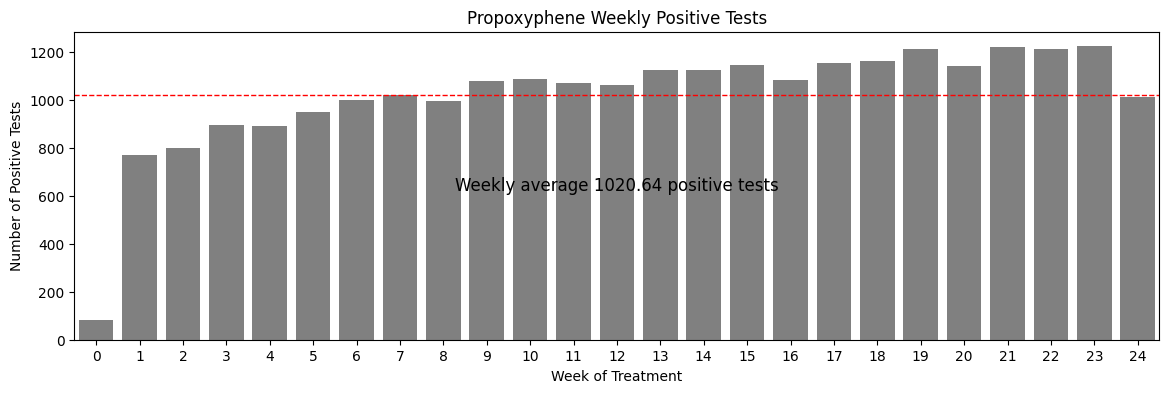

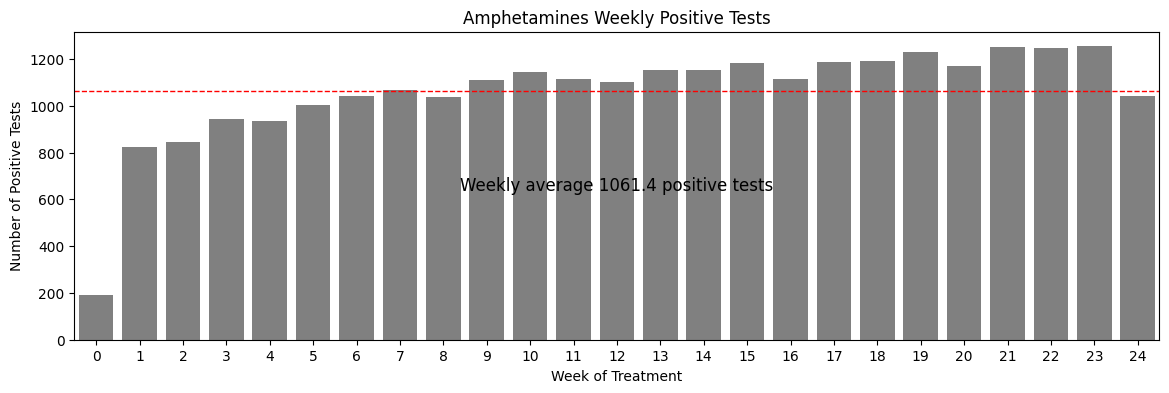

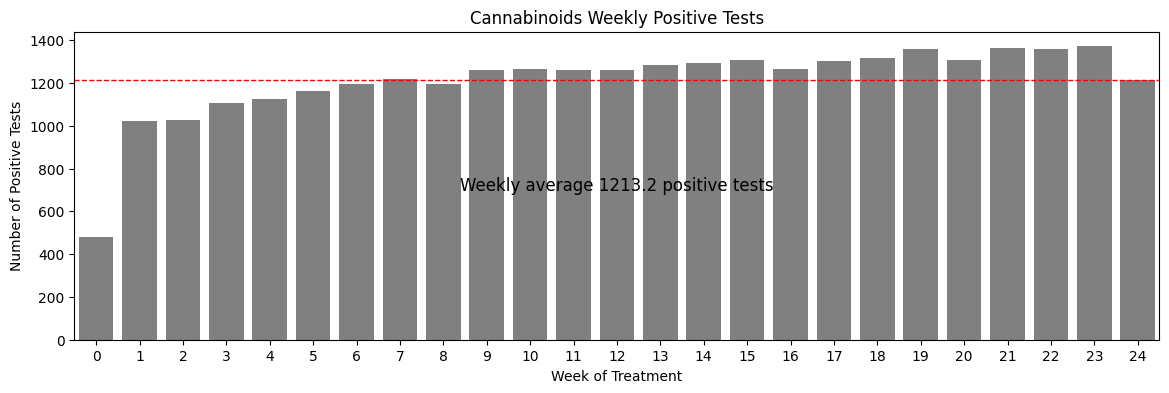

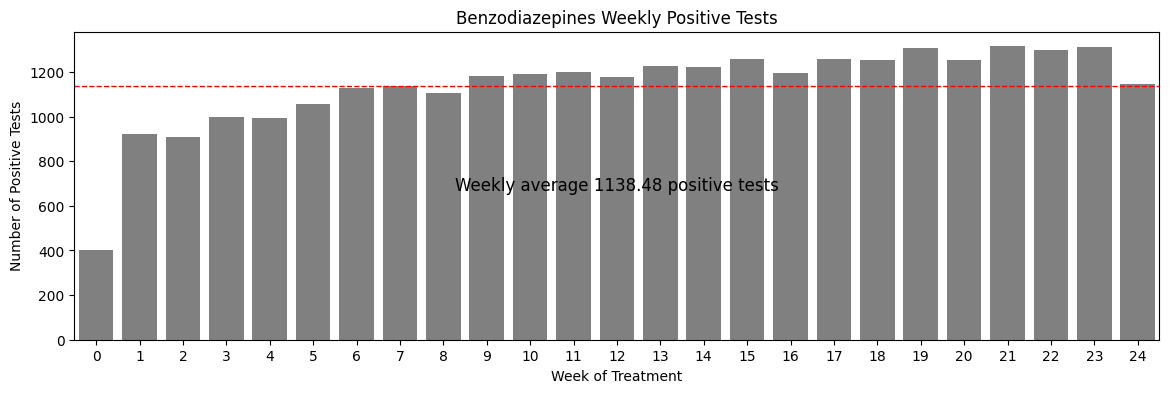

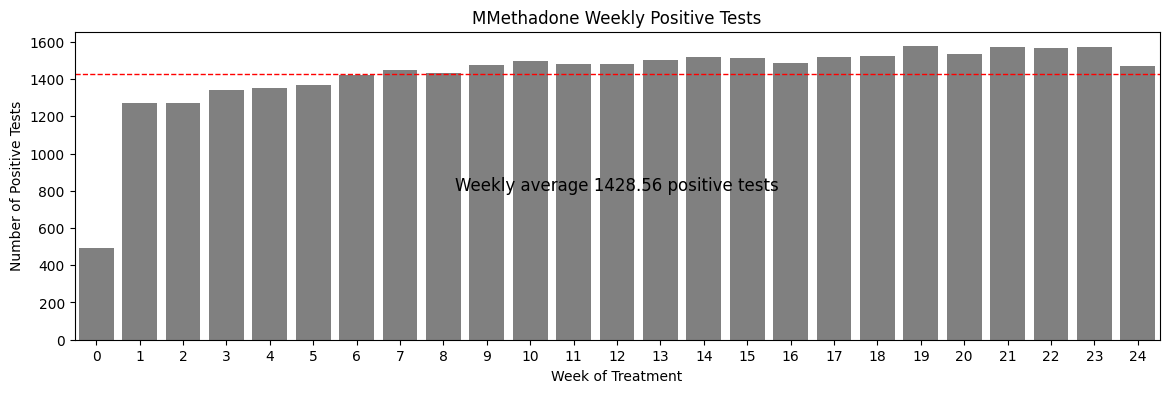

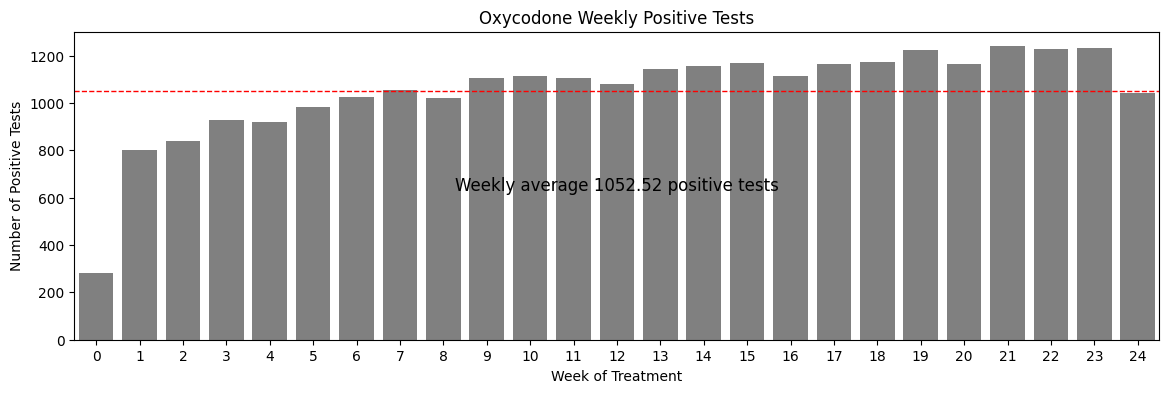

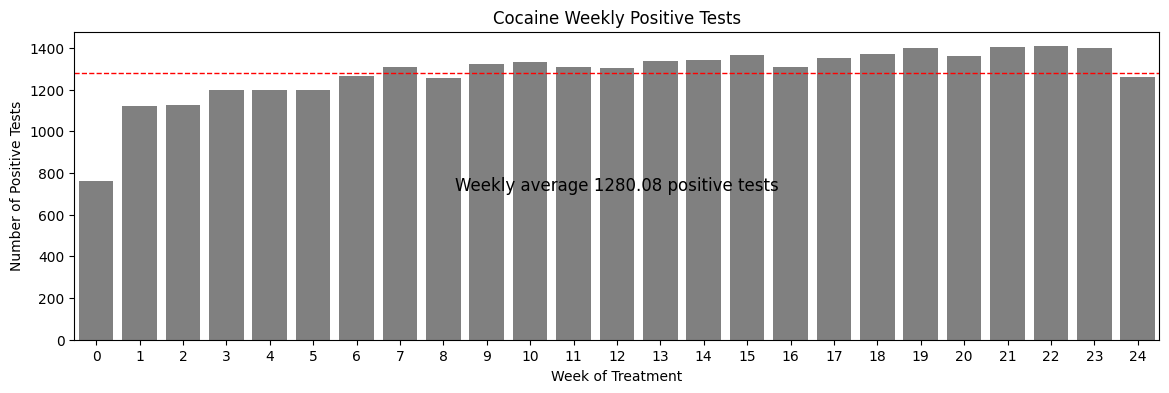

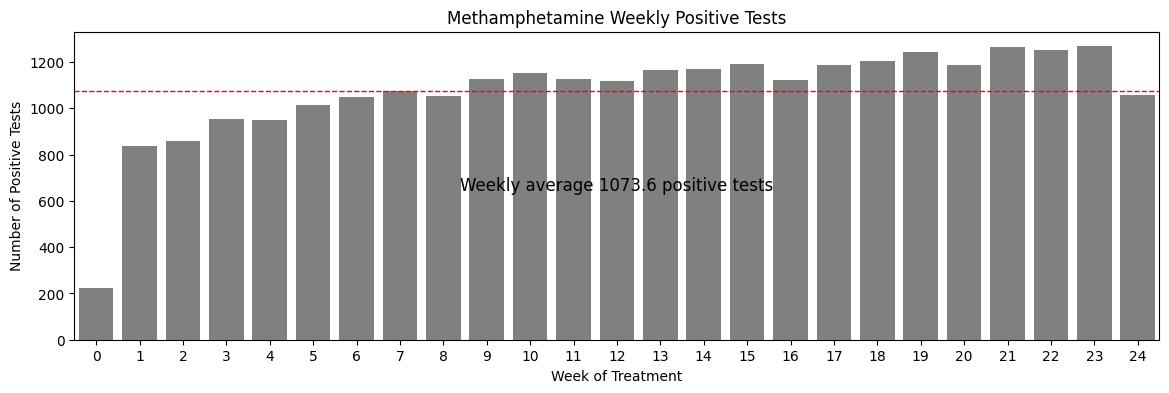

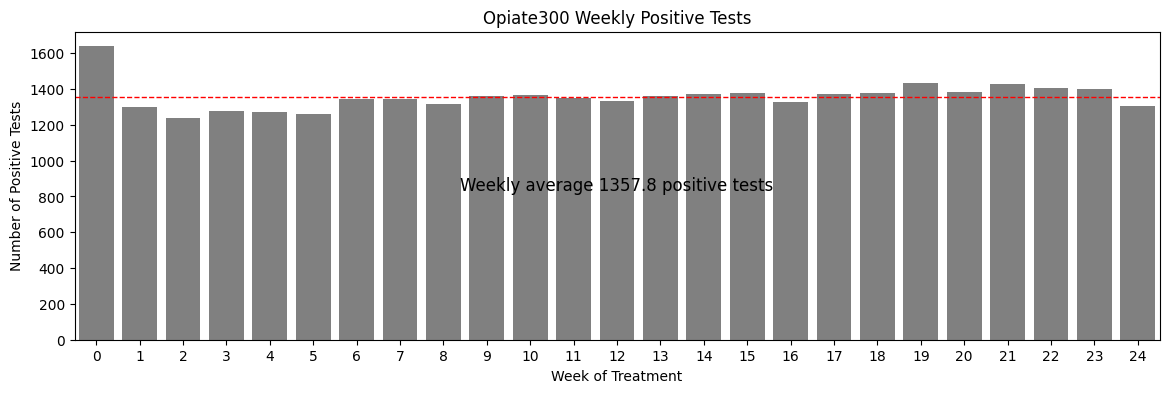

In [6]:

# create a separate plot for each drug test
for i, col in enumerate(drug_tests.columns):
	drug_names = drug_tests.columns[i]  # drug names used in plot titles
	# grab title from drug_dict, grab the value in the dictionary
	title = f'{drug_dict[col]} Weekly Positive Tests'  # title argument for plot_func()
	ylabel = 'Number of Positive Tests' # ylabel argument for plot_func()
	xlabel = 'Week of Treatment' # xlabel argument for plot_func()
	
	fig = plt.figure(figsize=(14, 4))  # Create a new figure
	# Create barplot for each drug test, choose horizontal orientation
	sns.barplot(x=drug_tests.index, y=col, data=drug_tests, color='gray')
	plt.axhline(drug_tests[col].mean(), color='red', linestyle='--', linewidth=1)  # Add mean line
	plt.annotate(
		f"Weekly average {drug_tests[col].mean().round(2)} positive tests",
		xy=(0.5, 0.5),
		xycoords="axes fraction",
		ha="center",
		va="center",
		fontsize=12,
		color="black",
	);
	
	# Add plot titles and labels
	plt.title(title)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	
	plt.show()  # Display the plot

### Review DSM Data
DSM provides the guidlines for diagnosing mental illness.<br>
<br>
Groupbed by Diagnosis<br>
<br>
**Abuse**
| drugclass          | value   |   count |   percentage |
|:----------------|:--------|--------:|-------------:|
| dsm_cannabis    | abuse   |     218 |         0.11 |
| dsm_cocaine     | abuse   |     185 |         0.1  |
| dsm_sedative    | abuse   |     123 |         0.06 |
| dsm_opiates     | abuse   |       1 |         0    |
| dsm_alcohol     | abuse   |     262 |         0.14 |
| dsm_amphetamine | abuse   |     109 |         0.06 | 

**Dependence**
| drugclass          | value      |   count |   percentage |
|:----------------|:-----------|--------:|-------------:|
| dsm_cannabis    | dependence |      73 |         0.04 |
| dsm_cocaine     | dependence |     305 |         0.16 |
| dsm_sedative    | dependence |      90 |         0.05 |
| dsm_opiates     | dependence |    1486 |         0.78 |
| dsm_alcohol     | dependence |     102 |         0.05 |
| dsm_amphetamine | dependence |      67 |         0.03 |

**No Diagnosis**
 | drugclass          | value        |   count |   percentage |
|:----------------|:-------------|--------:|-------------:|
| dsm_cannabis    | no_diagnosis |    1196 |         0.62 |
| dsm_cocaine     | no_diagnosis |     997 |         0.52 |
| dsm_sedative    | no_diagnosis |    1274 |         0.66 |
| dsm_alcohol     | no_diagnosis |    1123 |         0.59 |
| dsm_amphetamine | no_diagnosis |    1311 |         0.68 |

In [ ]:
# This is the code that creates the markdown table above

# get the columns for the dsm data
dsm = data[[col for col in data.columns if col.startswith('dsm_')]]

# call helper function to extract the value counts and organize them into a table
dsm_vc = helper.df_value_counts(dsm)

# convert to markdown
dsm_vc.to_markdown()

# display markdown table through ipython display
display(Markdown(dsm_vc.to_markdown()))


In [ ]:
# reogroup the data into three tables to make it easier to read

# create list of diagnosis to loop through
diagnosis = ['abuse', 'dependence', 'no_diagnosis']

# iterate through each diagnosis
for disorder in diagnosis:
    # create a dataframe for ea disorder
    globals()[disorder] = dsm_vc[dsm_vc['value']==disorder]
    # convert to markdown
    globals()[disorder].to_markdown()
    # print the disorder before the ipython display
    print(disorder)
    display(Markdown(globals()[disorder].to_markdown()))
    